In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

### The Kaggle file provides 4 folders: 
volcanoes_test ,  Volcanoes_test,  volcanoes_train,  Volcanoes_train

#### I check df.equals() on the training sets and they see, to be the exact same files

In [3]:
X = pd.read_csv('volcanoe-data/volcanoes_train/train_images.csv',header= None)
y = pd.read_csv('volcanoe-data/volcanoes_train/train_labels.csv')

In [95]:
y1 = pd.read_csv('volcanoe-data/volcanoes_train/train_labels.csv')

In [97]:
y1[y1['Type'].notnull()]

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
9,1,1.0,22.02,1.0
15,1,1.0,14.76,1.0
29,1,4.0,6.40,1.0
34,1,3.0,21.63,2.0
...,...,...,...,...
6940,1,2.0,25.50,1.0
6947,1,2.0,21.10,1.0
6949,1,4.0,4.00,1.0
6975,1,3.0,27.02,1.0


#### The two y train sets seem to be exactly the same too. So, I will choose the lower case one

In [7]:
#X.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [17]:
#X.shape

(7000, 12100)

In [94]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [18]:
#y.shape

(7000, 4)

**Lets check the balence of the classes before we split our data for training**

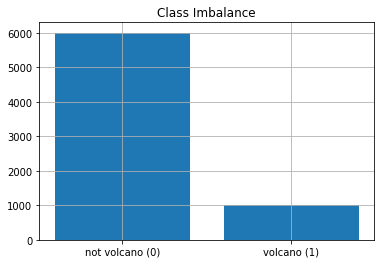

In [6]:
from src.volcano import class_imbalanced_plot
import matplotlib.pyplot as plt
class_imbalanced_plot(y)


**I will have to choose a technique for resampleing. there are sevrale ways to deal with imbalenced class:**
 - Augmentaion: create more minority class images by flipping, rotating, croping, or changing image quality of samples and saving as new samples
 - Under sampleing: by why throw out data - may cause over fitting
 - SMOTE: sintheticaly making more samples from minority class samples
 - weighting classes: (I read that this does work will woth image data)
 
**I Think what i wil do is try my model with both smoting and augmentation at some point. Firsti will go with smoteing becaseu for my spacific data set , al images are with the same exact resolutotion and croping.**

**Lets try making a few synthetic samples of volcano imahges and see who they looks**

**But first lets do a train test split**

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
#X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=666)

In [7]:
from src.volcano import volcano_images


In [11]:
import matplotlib.pyplot as plt



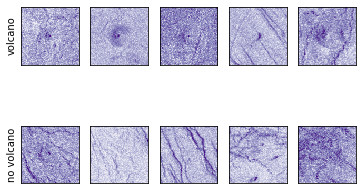

In [10]:
volcano_images(X,y)

**Lets try to get my X into the correct shape to feed into a CNN**

In [11]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape


In [6]:
import numpy as np
import pandas as pd

**Lets try this another way**

In [7]:


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout



In [8]:
Xtrain =  X/256
ytrain = y['Volcano?']


In [9]:
from sklearn.model_selection import train_test_split

In [9]:
img_rows, img_cols = 110, 110

X = Xtrain.values.reshape((-1, img_rows, img_cols, 1))
y = ytrain.values
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.2, random_state = 666)


#X_test = Xtest_raw.values.reshape((-1, img_rows, img_cols, 1))
#y_test = ytest_raw.values

In [51]:
modelCNN1 = Sequential()
modelCNN1.add(Conv2D(6, kernel_size = (3,3), activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
#modelCNN1.add(Conv2D(24, kernel_size = (3,3), activation = 'relu'))
#modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
#modelCNN1.add(Dropout(0.5))
modelCNN1.add(Flatten())
modelCNN1.add(Dense(12,activation = 'relu'))
modelCNN1.add(Dense(1, activation = 'sigmoid'))

In [17]:
modelCNN1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 108, 6)       60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 52, 12)        660       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8112)              0

In [52]:
metrics1 = ['accuracy','TruePositives', 'TrueNegatives','FalsePositives','FalseNegatives','Precision','Recall']
metrics2 = ['Precision','Recall','accuracy']

In [53]:
modelCNN1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = metrics1)

In [20]:
#from tf.keras.callbacks import EarlyStopping
#callBack = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto')

ModuleNotFoundError: No module named 'tf'

In [54]:
epochs =15
batch_size = 32

In [55]:
model3 = modelCNN1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali)
                       )


Epoch 1/15
175/175 [==============================] - 12s 71ms/step - loss: 0.4191 - accuracy: 0.8570 - true_positives: 1.0000 - true_negatives: 4798.0000 - false_positives: 7.0000 - false_negatives: 794.0000 - precision: 0.1250 - recall: 0.0013 - val_loss: 0.6398 - val_accuracy: 0.8536 - val_true_positives: 0.0000e+00 - val_true_negatives: 1195.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 205.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
175/175 [==============================] - 13s 75ms/step - loss: 0.4069 - accuracy: 0.8580 - true_positives: 0.0000e+00 - true_negatives: 4805.0000 - false_positives: 0.0000e+00 - false_negatives: 795.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6395 - val_accuracy: 0.8536 - val_true_positives: 0.0000e+00 - val_true_negatives: 1195.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 205.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
175/175 [====================

In [19]:
modelCNN1.save("model3.h5")
print("Saved model to disk")

Saved model to disk


In [104]:
historyCNN1 = model3.history

In [56]:
import pickle

with open('trainhistory/history3', 'wb') as file_pi:
        pickle.dump(historyCNN1, file_pi)

In [103]:
modelCNN1.history


In [105]:
historyCNN1


{'loss': [0.4191390872001648,
  0.40685412287712097,
  0.3988928198814392,
  0.39562979340553284,
  0.372185617685318,
  0.3371299207210541,
  0.2925393581390381,
  0.2699395418167114,
  0.2621895372867584,
  0.2509539723396301,
  0.24643170833587646,
  0.23876914381980896,
  0.23054936528205872,
  0.22392292320728302,
  0.21782104671001434],
 'accuracy': [0.8569642901420593,
  0.8580357432365417,
  0.8580357432365417,
  0.8580357432365417,
  0.8580357432365417,
  0.8580357432365417,
  0.8580357432365417,
  0.8905357122421265,
  0.9037500023841858,
  0.9083928465843201,
  0.9157142639160156,
  0.9150000214576721,
  0.9194642901420593,
  0.9225000143051147,
  0.9255357384681702],
 'true_positives': [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  221.0,
  321.0,
  371.0,
  410.0,
  411.0,
  429.0,
  481.0,
  474.0],
 'true_negatives': [4798.0,
  4805.0,
  4805.0,
  4805.0,
  4805.0,
  4805.0,
  4805.0,
  4766.0,
  4740.0,
  4716.0,
  4718.0,
  4713.0,
  4720.0,
  4685.0,
  4709.0],
 'f

''

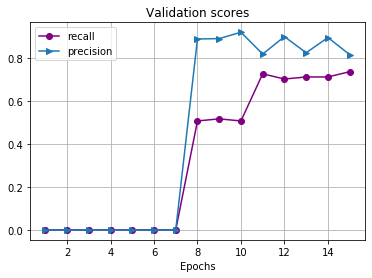

In [58]:
epochs = list(range(1,len(historyCNN1['loss'])+1))
#prec = history3['val_true_positives']/(history3['val_true_positives']+history3['val_false_positives'])
plt.plot(epochs,historyCNN1['val_recall'],'-o',label='recall',color='Purple')
plt.plot(epochs,historyCNN1['val_precision'],'->',label='precision')
#plt.plot(epochs,history3['val_true_negatives'],'-+',label='TN')
#plt.plot(epochs,history3['val_false_negatives'],'-s',label='FN')
plt.title('Validation scores')
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.savefig('images/CNN3_val_scores.png')
;

In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [32]:
from src.volcano import lr_plot

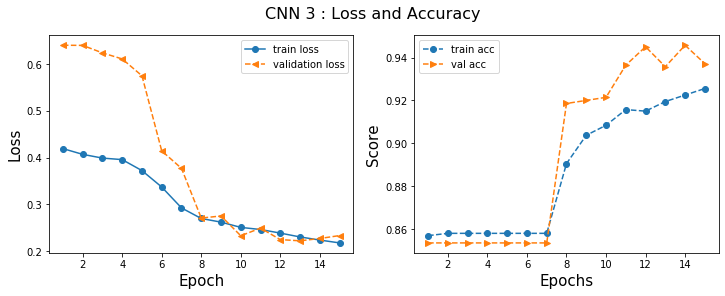

In [107]:
def lr_plot(history_obj,model_name):
    ''' input : model , model_name : tf model, str'''
    history = history_obj.history
    x_arr = np.arange(len(history['loss']))+1
    fig = plt.figure(figsize=(12,4))
    ax= fig.add_subplot(1,2,1)
    ax.plot(x_arr,history['loss'],'-o',label='train loss')
    ax.plot(x_arr,history['val_loss'],'--<',label='validation loss')
    ax.legend()
    ax.set_xlabel('Epoch',size=15)
    ax.set_ylabel('Loss',size=15)

    ax = fig.add_subplot(1,2,2)
    ax.plot(x_arr,history['accuracy'],'--o',label='train acc')
    ax.plot(x_arr,history['val_accuracy'],'-->',label='val acc')
    ax.legend()
    ax.set_xlabel('Epochs',size=15)
    ax.set_ylabel('Score',size=15)
    fig.suptitle(model_name,fontsize='16')
    plt.savefig('/home/rachel/Galvanize/capstone2/Cap2-repo/images/lr_plot_4acc.png')
lr_plot(model3,'CNN 3 : Loss and Accuracy')


In [ ]:
val_results = model3.evaluate()

In [66]:
tp15 = historyCNN1['val_true_positives'][-1]
tn15 =  historyCNN1['val_true_negatives'][-1]
fp15 =  historyCNN1['val_false_positives'][-1]
fn15 = historyCNN1['val_false_negatives'][-1]

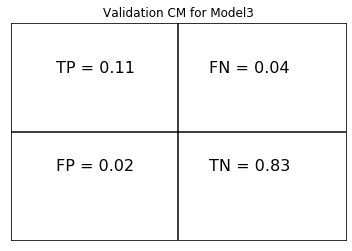

In [92]:

plt.plot()
plt.xticks([])
plt.yticks([])
plt.axhline(.5,color='k')
plt.axvline(.5,color='k')
#fig.suptite('Validation Confusion')
plt.text(.1,.8,f'TP = {round(tp15/(tp15+tn15+fp15+fn15),2)}',size=16)
plt.text(.1,.3,f'FP = {round(fp15/(tp15+tn15+fp15+fn15),2)}',size=16)
plt.text(.6,.8,f'FN = {round(fn15/(tp15+tn15+fp15+fn15),2)}',size=16)
plt.text(.6,.3,f'TN = {round(tn15/(tp15+tn15+fp15+fn15),2)}',size=16)
plt.title('Validation CM for Model3')
plt.savefig('images/cm_3_15.png')

In [90]:
(tp15+tn15+fp15+fn15)


7000.0

In [108]:
X_holdout = pd.read_csv('volcanoe-data/volcanoes_test/test_images.csv',header= None)
y_holdout = pd.read_csv('volcanoe-data/volcanoes_test/test_labels.csv')


In [109]:
Xhold =  X_holdout/256
yhold = y_holdout['Volcano?']
Xhold = Xhold.values.reshape((-1, img_rows, img_cols, 1))
yhold = yhold.values

In [112]:
holdout_results = modelCNN1.evaluate(Xhold,yhold)

86/86 [==============================] - 2s 29ms/step - loss: 0.2260 - accuracy: 0.9294 - true_positives: 321.0000 - true_negatives: 2220.0000 - false_positives: 80.0000 - false_negatives: 113.0000 - precision: 0.8005 - recall: 0.7396


In [115]:
score_list = ['loss','acc','tps','tns','fps','fns','prec','recall']

In [114]:
holdout_results

[0.22599050402641296,
 0.9294074773788452,
 321.0,
 2220.0,
 80.0,
 113.0,
 0.8004987239837646,
 0.7396313548088074]

In [116]:
for score,num in zip(score_list,holdout_results):
    print(f'{score} : {num}')

loss : 0.22599050402641296
acc : 0.9294074773788452
tps : 321.0
tns : 2220.0
fps : 80.0
fns : 113.0
prec : 0.8004987239837646
recall : 0.7396313548088074


In [ ]:
pred = modelCNN1(Xhold)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

In [9]:
model = load_model('model3.h5')